<a href="https://colab.research.google.com/github/SambhavDjain/Ml_Projects/blob/main/Multiclass_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Working with a larger example (Multiclass classification)
When you have more than 2 classes as an option its known as multi-class classification
* It measn if u have 3 different classes its multiclass classification

For practising the multi-class classification we're going to build a neural network to clarify images of different items of claothing


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for us
(train_data, train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:

#Show the first learning training exaple
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")


Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
#Check the shape of a single example
train_data[0].shape,train_labels[0].shape #the empty bracket is scalar value

((28, 28), ())

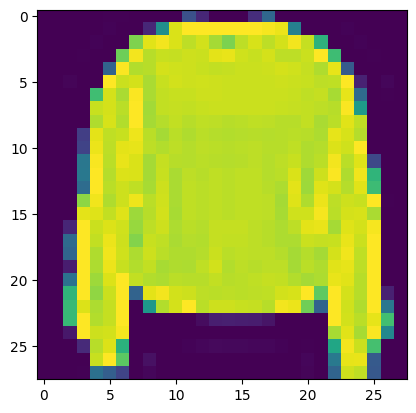

In [4]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]) #used to diaplay image data

In [5]:
#Check sample labels
train_labels[7]

np.uint8(2)

In [6]:
#Create a small list so we can index into training labels so they are human readable
class_names  = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

'index_of_choice → Which image to look at (like number 20).\n\ntrain_labels[index_of_choice] → Gets the number label (like 7).\n\nclass_names[...] → Turns that number into a word (like "Sneaker").\n\nplt.title(...) → Shows that word as the title on the image.'

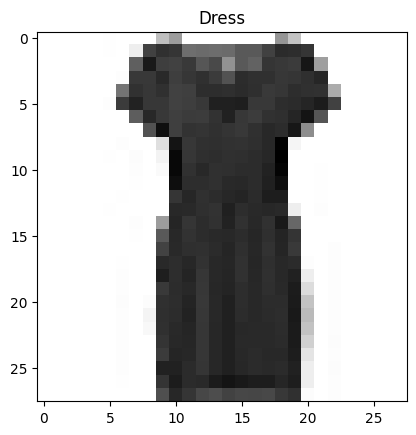

In [7]:
#Plot an exaple image and its labels
index_of_choice = 20
plt.imshow(train_data[index_of_choice],cmap =plt.cm.binary)#,cmap =plt.cm.binary is used to provied balck and white view of image
plt.title(class_names[train_labels[index_of_choice]])
'''index_of_choice → Which image to look at (like number 20).

train_labels[index_of_choice] → Gets the number label (like 7).

class_names[...] → Turns that number into a word (like "Sneaker").

plt.title(...) → Shows that word as the title on the image.'''

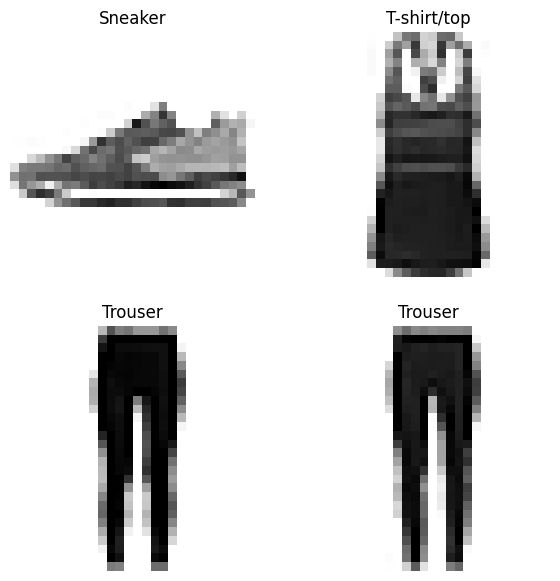

In [8]:

#Plot the multiple random images of fashion MNIST
import random
plt.figure(figsize= (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

#Building a multi-class classification model
for our model class slassification model, uwe use a similar architecture to our binary classifiers , however we're going to have to tweak a few things:

* Input shape - 28x28 /(the shape of one image)
* Output shape - 10 (one per class of clothing)
* Loss function - tf.keras.losses.categoricalCrossentropy()
* Output layer Activation  = Softmax(not Sigmoid )
* Loss Function - tf.keras.losses.CategoricalCrossentropy()
  * If our labesl are one_hot encoded,use categoricalCrossentropy()
  * If labels are integer use sparseCategoricalCrossentropy

###**Important** - Use SparseCategoricalCrossentropy when your labels are just class numbers, and CategoricalCrossentropy when your labels are one-hot encoded
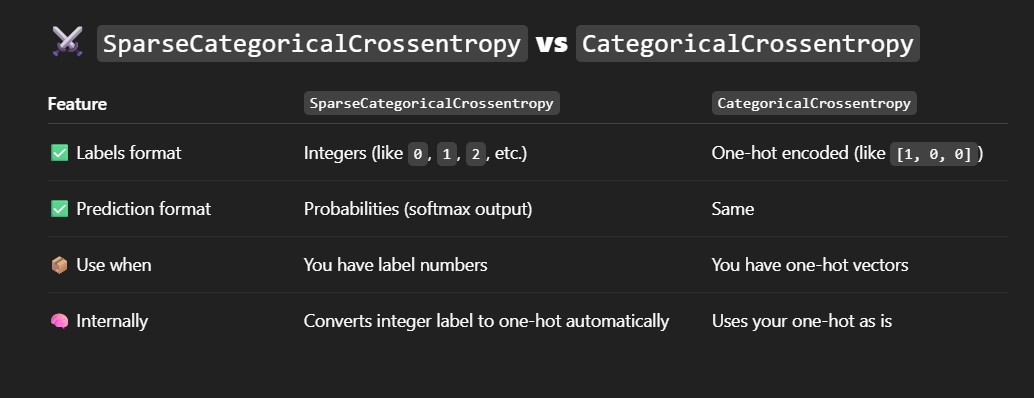



In [9]:
#Our data needs to be flatten (from28*28 to None, 784)
flatten_model =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28))])#thus the input shape is given above
flatten_model.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [10]:
tf.one_hot(train_labels[:10],depth =10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [11]:
'''#by using the SparseCategoricalCrossentropy
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))
'''

'#by using the SparseCategoricalCrossentropy\n# Set random seed\ntf.random.set_seed(42)\n\n# Create the model\nmodel_1 = tf.keras.Sequential([\n  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)\n  tf.keras.layers.Dense(4, activation="relu"),\n  tf.keras.layers.Dense(4, activation="relu"),\n  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax\n])\n\n# Compile the model\nmodel_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation\n                 optimizer=tf.keras.optimizers.Adam(),\n                 metrics=["accuracy"])\n\n# Fit the model\nnon_norm_history = model_1.fit(train_data,\n                                train_labels,\n                                epochs=10,\n                                validation_data=(test_data, test_labels))\n'

In [12]:
#By not using the sparsecategoricalcrossentropy
#Set random seed
tf.random.set_seed(42)

#Create teh model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
        ])
#Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#Fit the model
non_norm_history = model_1.fit(train_data,train_labels,epochs =10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.1076 - loss: 3.0320 - val_accuracy: 0.1996 - val_loss: 1.8908
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.2119 - loss: 1.8206 - val_accuracy: 0.2683 - val_loss: 1.6999
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.2722 - loss: 1.6837 - val_accuracy: 0.2889 - val_loss: 1.6448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.2820 - loss: 1.6399 - val_accuracy: 0.2962 - val_loss: 1.6213
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.2872 - loss: 1.6188 - val_accuracy: 0.3014 - val_loss: 1.6095
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2936 - loss: 1.6045 - val_accuracy: 0.3121 - val_loss: 1.5987
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3029 - loss: 1.5949 - val_accuracy: 0.3182 - val_loss: 1.5871
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3168 - loss: 1.5

In [13]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [14]:
#cHcek the min and max values of training data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

###Normalization of the Dataset
Neural Networks prefrer data to be scaled(or normalized),this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.
Normalization helps ML/DL models learn faster, better, and more accurately by scaling data to a consistent range like 0–1.

In [15]:
#We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm= train_data / 255.0
test_data_norm = test_data / 255.0

#Check the min and max values  of the scaled training data
train_data_norm.min(),train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

In [16]:
#Now the data is normalized
#Set random seed
tf.random.set_seed(42)

#Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])
#Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
#Fit the model
norm_history = model_2.fit(train_data_norm,
                           train_labels,
                           epochs = 10,
                           validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4121 - loss: 1.5023 - val_accuracy: 0.7066 - val_loss: 0.7685
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7292 - loss: 0.7316 - val_accuracy: 0.7605 - val_loss: 0.6755
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7770 - loss: 0.6508 - val_accuracy: 0.7771 - val_loss: 0.6383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7895 - loss: 0.6154 - val_accuracy: 0.7852 - val_loss: 0.6192
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7968 - loss: 0.5935 - val_accuracy: 0.7907 - val_loss: 0.6042
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8023 - loss: 0.5770 - val_accuracy: 0.7958 - val_loss: 0.5942
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8056 - loss: 0.5646 - val_accuracy: 0.7995 - val_loss: 0.5874
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8094 - loss: 0.5544 -

<Axes: title={'center': 'Normalized Data'}>

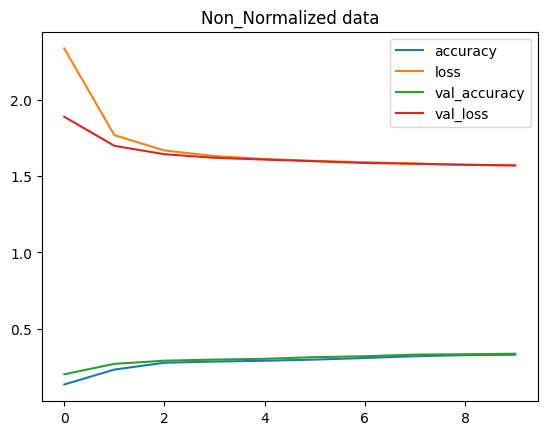

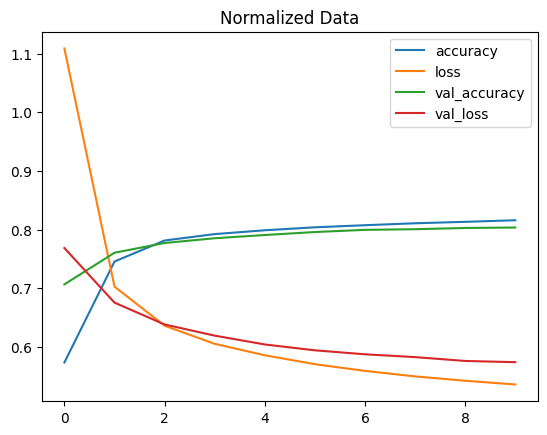

In [17]:
#ploting the curves
import pandas as pd
#plot non_normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title = "Non_Normalized data")
#Plot a normalized data loss curve
pd.DataFrame(norm_history.history).plot(title = "Normalized Data")


**Note :** The same model with even slightlu differernt data can produce hhigh diff results


#Finding the learning ratre


In [18]:
#Set random seed
tf.random.set_seed(42)
#Create model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

#Compilke the model

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#Create a lR_schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

#fit the model
find_lr_history = model_3.fit(train_data_norm,train_labels,epochs = 40,validation_data=(test_data_norm,test_labels), callbacks = [lr_schedular])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1911 - loss: 2.0835 - val_accuracy: 0.2552 - val_loss: 1.8707 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2846 - loss: 1.8045 - val_accuracy: 0.5126 - val_loss: 1.3082 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5490 - loss: 1.2245 - val_accuracy: 0.5866 - val_loss: 1.1018 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6172 - loss: 1.0561 - val_accuracy: 0.6579 - val_loss: 0.9679 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6786 - loss: 0.9244 - val_accuracy: 0.7391 - val_loss: 0.8311 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7473 - loss: 0.7960 - val_accuracy: 0.7466 - val_loss: 0.7725 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7588 - l

Text(0.5, 1.0, 'Finding the decay curve ')

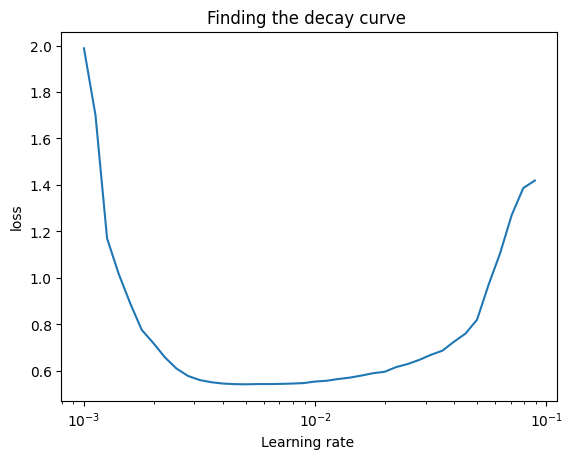

In [19]:
#Now Let's plot ther learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate ")
plt.ylabel("loss")
plt.title("Finding the decay curve ")

In [20]:
 #Lets refit the model with ideal learning rate

#Set random seed
tf.random.set_seed(42)

#Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"),
])
#Compile the model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

#Fit the model
model_4.fit(train_data_norm,train_labels,epochs = 10,validation_data = (test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4120 - loss: 1.4981 - val_accuracy: 0.7483 - val_loss: 0.7319
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7614 - loss: 0.6742 - val_accuracy: 0.7797 - val_loss: 0.6511
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7881 - loss: 0.6098 - val_accuracy: 0.7915 - val_loss: 0.6107
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7974 - loss: 0.5807 - val_accuracy: 0.7963 - val_loss: 0.5919
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8040 - loss: 0.5644 - val_accuracy: 0.8008 - val_loss: 0.5791
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8065 - loss: 0.5538 - val_accuracy: 0.8007 - val_loss: 0.5716
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8092 - loss: 0.5462 - val_accuracy: 0.8020 - val_loss: 0.5654
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8115 - loss: 0.53

###Evaluating our Multi-class classification model

To evaluate our multi-classs classification model we could:
* Evaluate its performance using other classification metrics(such as confusion matrix)
*Asses some of its results (by trainign it for longer or changing the architecture)
* Save and export it for use in an application



In [21]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(Y_true, Y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create confusion matrix
    cm = confusion_matrix(Y_true, Y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # Normalize
    n_classes = cm.shape[0]

    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels
    labels = classes if classes else np.arange(n_classes)
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Place x-axis labels at the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set font size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Show the values inside the boxes
    threshold = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    plt.show()


In [22]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [23]:
#Make some predictions with model
Y_probs = model_4.predict(test_data_norm)

#view the 5 predictions
Y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.31711349e-04, 1.23681143e-11, 2.29650941e-05, 1.52350943e-09,
        5.97740568e-09, 2.87480026e-01, 1.60287120e-04, 9.87324119e-02,
        1.26954122e-03, 6.12202883e-01],
       [2.71926874e-05, 5.88139021e-14, 9.64208066e-01, 2.29968350e-06,
        5.65897720e-03, 5.93144186e-22, 3.01023778e-02, 7.91925761e-18,
        9.14937516e-07, 2.75315575e-08],
       [6.87163323e-04, 9.98640478e-01, 4.62394070e-08, 5.45837218e-04,
        6.87733018e-06, 1.43048136e-22, 6.27416812e-05, 1.87164173e-10,
        5.68773758e-05, 4.01456178e-15],
       [1.98374153e-03, 9.95114982e-01, 8.90863191e-07, 2.11244309e-03,
        6.53786556e-05, 5.04926994e-17, 3.57588055e-04, 2.76010095e-08,
        3.64801002e-04, 3.07317106e-12],
       [8.60409737e-02, 3.13049600e-06, 4.66009319e-01, 2.02822108e-02,
        1.39738945e-02, 5.44519365e-14, 4.12542373e-01, 1.58606177e-08,
        1.13563088e-03, 1.24102680e-05]], dtype=float32)

**Note:** Remember when make predictions on same kind of data model was trained on(if model trained on normalized data , make predictions on the normalized data too)

In [24]:
Y_probs[0],tf.argmax(Y_probs[0]),class_names[tf.argmax(Y_probs[1])]

(array([1.3171135e-04, 1.2368114e-11, 2.2965094e-05, 1.5235094e-09,
        5.9774057e-09, 2.8748003e-01, 1.6028712e-04, 9.8732412e-02,
        1.2695412e-03, 6.1220288e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Pullover')

In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
#Convert all predictions probabilities into integers
Y_pred = Y_probs.argmax(axis=1)

#View the first 10 predictions
Y_pred[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])

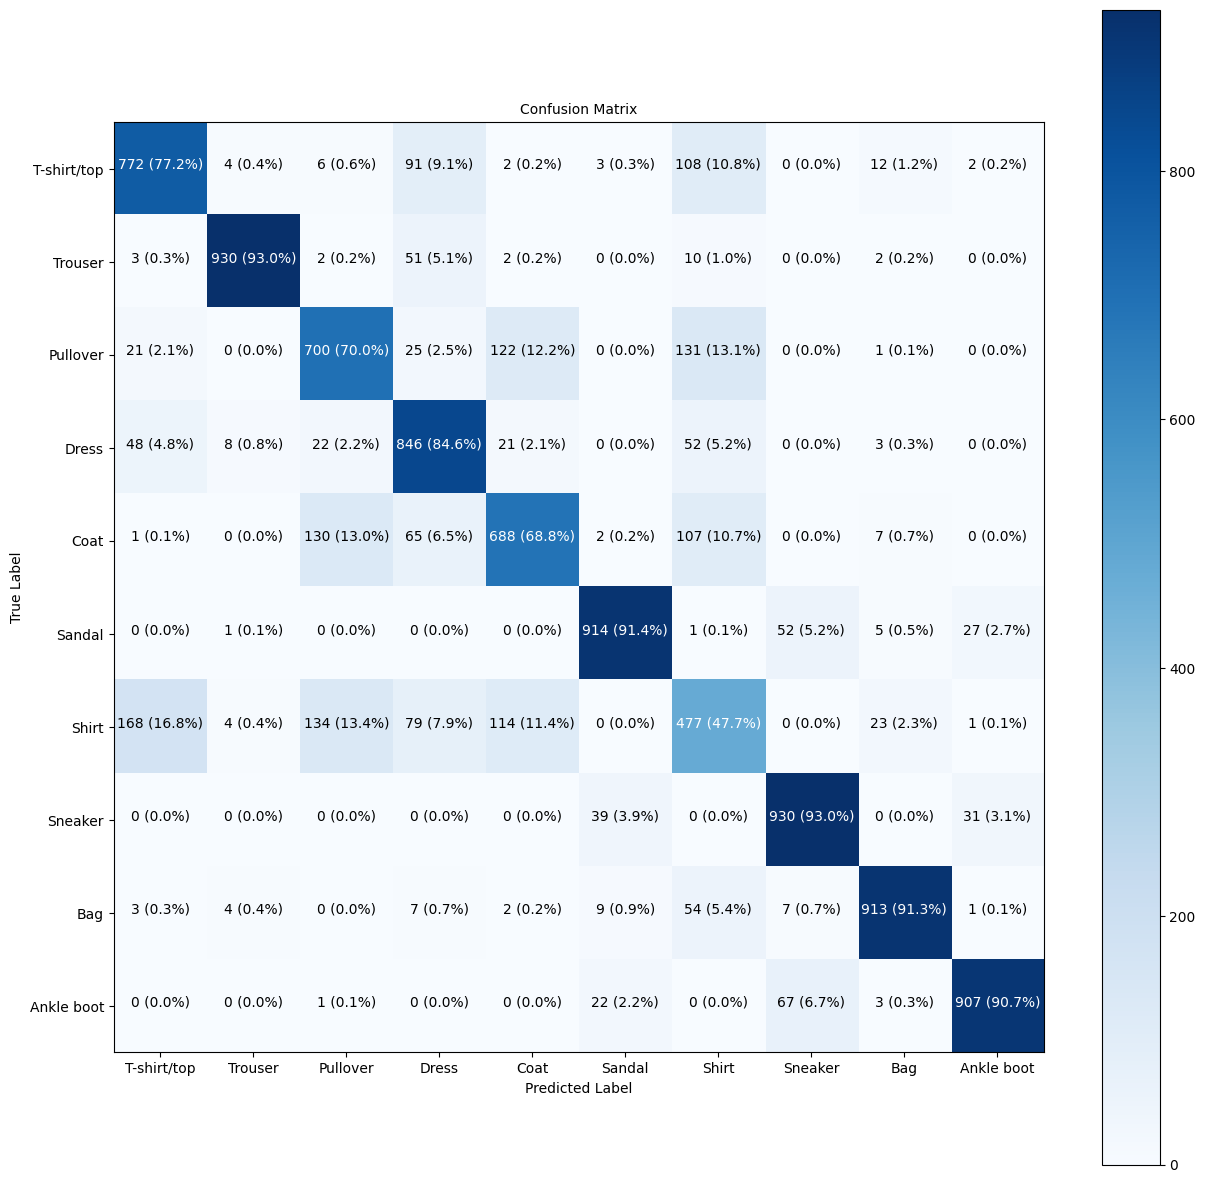

In [27]:
from sklearn.metrics import confusion_matrix
make_confusion_matrix(Y_true=test_labels,
                      Y_pred=Y_pred,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)


#Create a little fun functions

* Plot a random image
* Make predictions on said image
* label the plot with the truth label and the predict label

In [28]:
import random
def plot_random_image(model,images,true_labels,classes):

  '''
  Pick a random image plot it and labels it with prediction and truth label;]

  '''
  #Set the random integer
  i =  random.randint(0,len(images)-1)
  #Create a predicted and targets
  target_image = images[i]
  pred_probs= model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_labels = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_labels:
    color  = "green"
  else:
    color = "red"

  #Add Xlabel info (predictions /true label)
  plt.xlabel("Pred:{}{:2.0f}% (True:{})".format(pred_label,
                                              100*tf.reduce_max(pred_probs),
                                              true_labels),
             color = color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


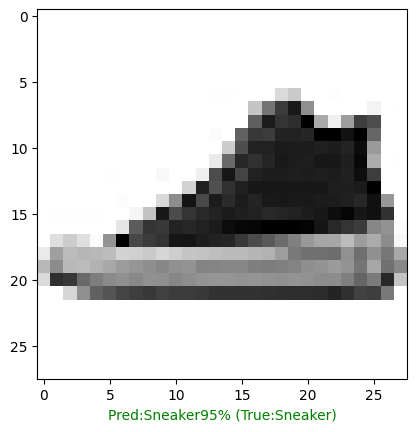

In [39]:
#Check random images as well as its predictions
plot_random_image(model = model_4,
                  images = test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [47]:
#What Patterns our mdoel is learning
model_4.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [52]:
#Get the patterns  of a layer in our network
weights , biases = model_4.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[-0.4143948 ,  0.09064022, -0.1653959 ,  0.04108065],
        [-0.02761277, -0.13804102,  0.16351211, -0.33683577],
        [-0.51400346, -0.0082404 , -0.09880549,  0.25422108],
        ...,
        [-0.20563608, -0.25550476, -0.43706873,  0.5508916 ],
        [-0.08876606, -0.10580009, -0.54723656,  0.6899953 ],
        [-0.50446916,  0.08911456, -0.11480712,  0.4045159 ]],
       dtype=float32),
 (784, 4))

#Now lets check the bias vector

In [53]:
#Bias and biases shapes

biases, biases.shape

(array([ 0.15559469, -0.3356771 ,  0.35389006,  0.09426139], dtype=float32),
 (4,))

#Each neuron has a bias vector.

Each of these is paired with a weights matrix.

The bias vector get initialized as zeros(at least in case of tensorflow)

The Bias vector dictates how muchh a patterns correponds weiht matrix sholud influence the next layer

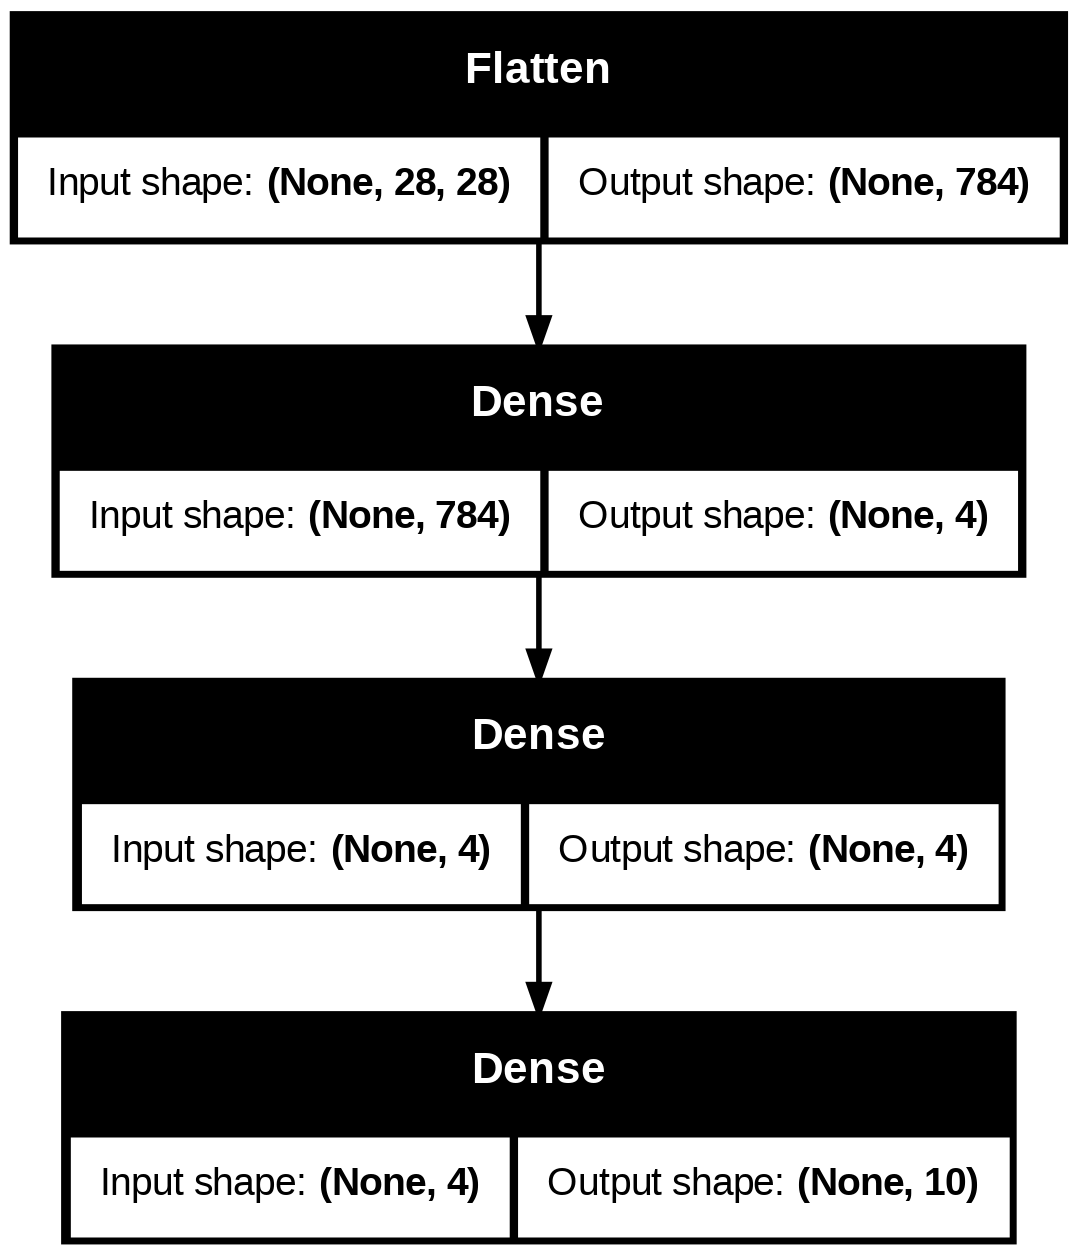

In [54]:
#Let's check out another way of viewing our deep learning modesls

from tensorflow.keras.utils import plot_model

#See the  inputs and outputs of each layers

plot_model(model_4,show_shapes = True)


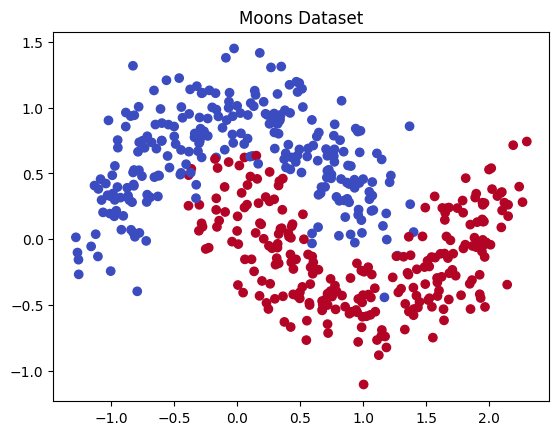

In [59]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create and plot dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Moons Dataset")
plt.show()



In [60]:
#Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = MLPClassifier(max_iter=1000, random_state=0)
model.fit(X_train, y_train)


MLPClassifier(max_iter=1000, random_state=0)

In [57]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))



Accuracy: 0.9666666666666667
